In [1]:
## EP1 - PSI3471
## Aluno: Leonardo Isao Komura - NUSP: 11261656

In [2]:
import cv2
import glob
import numpy as np; import sys; import os; from time import time
import pandas as pd
import matplotlib.pyplot as plt
import math
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dropout, Conv2D, MaxPooling2D, Dense, Flatten
from keras import optimizers
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [3]:
def le(diretorio,nl,nc,inic,fim):
    nclasses=len(diretorio)
    n=nclasses*(fim-inic+1)
    AX=np.empty((n,nl,nc),np.uint8);
    AY=np.empty((n,),np.uint8);
 
    j=0; k=0
    for nome in diretorio:
        for i in range(inic,fim+1):
            st = nome + " (" + str(i) + ")."+"jpg"; st = nome+"/"+st; #print(st)
            a=cv2.imread(st,cv2.IMREAD_GRAYSCALE)
            if a is None: print("Erro leitura",st); sys.exit()
            a=cv2.resize(a,(nl,nc),interpolation=cv2.INTER_AREA)
            AX[k,:,:]=a; AY[k]=j
            k+=1
        j+=1
    return AX,AY

In [4]:
diretorio=["Arborio","Basmati","Ipsala","Jasmine","Karacadag"]
nl = 125
nc = 125
AX,AY=le(diretorio,nl,nc,1,100)
qx,qy=le(diretorio,nl,nc,101,1000)

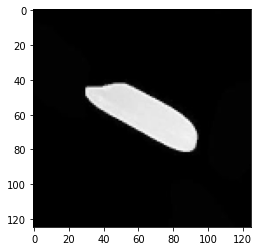

In [5]:
arborio = 0
basmati = 100
ipsala = 200
jasmine = 300
karacadag = 400

imgplot = plt.imshow(AX[jasmine+1], cmap='gray')
plt.show()

In [6]:
# Validação cruzada
from sklearn.model_selection import train_test_split
x_train, x_val, y_train1, y_val1 = train_test_split(AX, AY, test_size = 0.1, random_state=1)
print('Qtde de treino: {}'.format(len(x_train)))
print('Qtde de validação: {}'.format(len(x_val)))

Qtde de treino: 450
Qtde de validação: 50


In [7]:
y_train = keras.utils.to_categorical(y_train1, 5)
y_val = keras.utils.to_categorical(y_val1, 5)
qy2 = keras.utils.to_categorical(qy, 5)

In [8]:
model = Sequential() 
model.add(Conv2D(50, kernel_size=(3,3), activation='elu', input_shape=(125, 125, 1) )) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Conv2D(100, kernel_size=(3,3), activation='elu')) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(50, kernel_size=(3,3), activation='elu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(50, activation='elu')) 
model.add(Dense(5, activation='softmax')) 

In [9]:
opt=optimizers.Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.save_weights('model.h5')          # weights e bias iniciais

In [10]:
t0=time()
history = model.fit(x_train, y_train,
                    batch_size=25,
                    epochs=10,
                    validation_data=(x_val, y_val))
t1=time(); print("Tempo de treino: %.2f s"%(t1-t0))

score = model.evaluate(qx, qy2, verbose=False)
print('\nTest loss: %.4f'%(score[0]))
print('Test accuracy: %.2f %%'%(100*score[1]))
print('Test error: %.2f %%'%(100*(1-score[1])))

print("\n")
t2=time()
QP2=model.predict(qx); QP=np.argmax(QP2,1)
t3=time(); print("Tempo de predicao: %.2f s"%(t3-t2))
nerro=np.count_nonzero(QP-qy); print("nerro=%d"%(nerro))

Epoch 1/10
18/18 [==============================] - 12s 626ms/step - loss: 7.3614 - accuracy: 0.4844 - val_loss: 0.3621 - val_accuracy: 0.7800
Epoch 2/10
18/18 [==============================] - 11s 584ms/step - loss: 0.3341 - accuracy: 0.8711 - val_loss: 0.2850 - val_accuracy: 0.9400
Epoch 3/10
18/18 [==============================] - 11s 631ms/step - loss: 0.1533 - accuracy: 0.9578 - val_loss: 0.1469 - val_accuracy: 0.9400
Epoch 4/10
18/18 [==============================] - 10s 580ms/step - loss: 0.0614 - accuracy: 0.9800 - val_loss: 0.1417 - val_accuracy: 0.9600
Epoch 5/10
18/18 [==============================] - 11s 618ms/step - loss: 0.0591 - accuracy: 0.9822 - val_loss: 0.0479 - val_accuracy: 0.9800
Epoch 6/10
18/18 [==============================] - 11s 619ms/step - loss: 0.0414 - accuracy: 0.9844 - val_loss: 0.0649 - val_accuracy: 0.9800
Epoch 7/10
18/18 [==============================] - 11s 603ms/step - loss: 0.0231 - accuracy: 0.9889 - val_loss: 0.1798 - val_accuracy: 0.9400

In [11]:
model.load_weights('model.h5')
t0=time()
history = model.fit(x_train, y_train,
                    batch_size=50,
                    epochs=10,
                    validation_data=(x_val, y_val))
t1=time(); print("Tempo de treino: %.2f s"%(t1-t0))

score = model.evaluate(qx, qy2, verbose=False)
print('\nTest loss: %.4f'%(score[0]))
print('Test accuracy: %.2f %%'%(100*score[1]))
print('Test error: %.2f %%'%(100*(1-score[1])))

print("\n")
t2=time()
QP2=model.predict(qx); QP=np.argmax(QP2,1)
t3=time(); print("Tempo de predicao: %.2f s"%(t3-t2))
nerro=np.count_nonzero(QP-qy); print("nerro=%d"%(nerro))

Epoch 1/10
9/9 [==============================] - 11s 1s/step - loss: 10.1515 - accuracy: 0.3489 - val_loss: 1.2987 - val_accuracy: 0.3600
Epoch 2/10
9/9 [==============================] - 11s 1s/step - loss: 1.0530 - accuracy: 0.5444 - val_loss: 1.3157 - val_accuracy: 0.4200
Epoch 3/10
9/9 [==============================] - 10s 1s/step - loss: 0.8896 - accuracy: 0.6067 - val_loss: 1.1626 - val_accuracy: 0.4400
Epoch 4/10
9/9 [==============================] - 10s 1s/step - loss: 0.7129 - accuracy: 0.6644 - val_loss: 0.6939 - val_accuracy: 0.6800
Epoch 5/10
9/9 [==============================] - 11s 1s/step - loss: 0.5495 - accuracy: 0.7711 - val_loss: 0.4731 - val_accuracy: 0.7400
Epoch 6/10
9/9 [==============================] - 10s 1s/step - loss: 0.4599 - accuracy: 0.7578 - val_loss: 0.3944 - val_accuracy: 0.7600
Epoch 7/10
9/9 [==============================] - 11s 1s/step - loss: 0.3924 - accuracy: 0.7200 - val_loss: 0.6233 - val_accuracy: 0.6800
Epoch 8/10
9/9 [=================

In [12]:
model.load_weights('model.h5')
t0=time()
history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=10,
                    validation_data=(x_val, y_val))
t1=time(); print("Tempo de treino: %.2f s"%(t1-t0))

score = model.evaluate(qx, qy2, verbose=False)
print('\nTest loss: %.4f'%(score[0]))
print('Test accuracy: %.2f %%'%(100*score[1]))
print('Test error: %.2f %%'%(100*(1-score[1])))

print("\n")
t2=time()
QP2=model.predict(qx); QP=np.argmax(QP2,1)
t3=time(); print("Tempo de predicao: %.2f s"%(t3-t2))
nerro=np.count_nonzero(QP-qy); print("nerro=%d"%(nerro))

Epoch 1/10
5/5 [==============================] - 11s 2s/step - loss: 14.5248 - accuracy: 0.3444 - val_loss: 3.6825 - val_accuracy: 0.3800
Epoch 2/10
5/5 [==============================] - 11s 2s/step - loss: 0.9848 - accuracy: 0.6556 - val_loss: 0.5470 - val_accuracy: 0.7200
Epoch 3/10
5/5 [==============================] - 10s 2s/step - loss: 0.4428 - accuracy: 0.8022 - val_loss: 1.0140 - val_accuracy: 0.8200
Epoch 4/10
5/5 [==============================] - 10s 2s/step - loss: 0.2687 - accuracy: 0.8911 - val_loss: 0.3919 - val_accuracy: 0.9200
Epoch 5/10
5/5 [==============================] - 11s 2s/step - loss: 0.1365 - accuracy: 0.9356 - val_loss: 1.2587 - val_accuracy: 0.8800
Epoch 6/10
5/5 [==============================] - 10s 2s/step - loss: 0.1053 - accuracy: 0.9600 - val_loss: 1.2074 - val_accuracy: 0.8800
Epoch 7/10
5/5 [==============================] - 10s 2s/step - loss: 0.0946 - accuracy: 0.9556 - val_loss: 0.1568 - val_accuracy: 0.9600
Epoch 8/10
5/5 [=================